# Uniform random number generator

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time
import random as rd

In [3]:
def test_random_generator(samples):
    """
    
    """
    
    # get the baseline
    baseline = [rd.uniform(0, 1) for x in range(samples)]
    return baseline

test1 = test_random_generator(100)

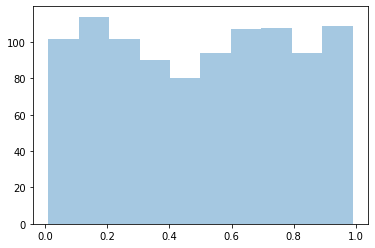

In [4]:
def uniform_gen_waiting_time_test(samples):
    """

    """
    result = []
    for x in range(samples):
        n = time.time()
        result.append(float(str(n)[-2:]) / 100)
        time.sleep(.0001)
    return result

dist_test = uniform_gen_waiting_time_test(1000)
sns.distplot(dist_test, bins=10, kde=False)

In [5]:
class PseudoRandomGen(object):
    """
    implements a lagged Fibonacci generator (LFG)
    """
    def __init__(self, seed, opp: str="+", j: int=3, k: int=7, m: int=10):
        # check for requirements of j and k
        assert 0 < j < k
        
        # check the requirements of the seed
        self.seed = str(seed)
        assert len(self.seed) >= k
        
        if opp == "+":
            self.opp = lambda x, y : x + y
        elif opp == "-":
            self.opp = lambda x, y : x - y
        elif opp == "*":
            self.opp = lambda x, y : x * y
        else:
            raise Exception('operation is not supported')
            
        self.seed = np.array(list(map(int, self.seed)))
        self.j = j
        self.k = k
        self.m = m
    
    def gen_random(self):
        """
        
        """
        new_int = self.opp(self.seed[self.j - 1], self.seed[self.k - 1]) % self.m
        self.seed = np.append(self.seed[1:], new_int)
        return new_int

In [6]:
rd_test = PseudoRandomGen(6421893)

for x in range(0, 5):
    print("{0} --> {1}".format(rd_test.seed, rd_test.gen_random()))

[6 4 2 1 8 9 3] --> 5
[4 2 1 8 9 3 5] --> 6
[2 1 8 9 3 5 6] --> 4
[1 8 9 3 5 6 4] --> 3
[8 9 3 5 6 4 3] --> 6


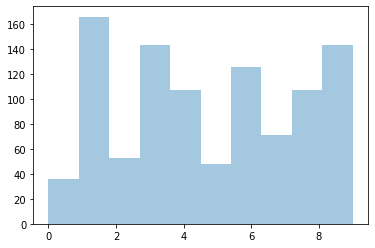

In [32]:
for x in [1000, 10000, 50000, 100000]:
    new_rd = PseudoRandomGen(6421893)
    
    dist = []
    for i in range(x):
        dist.append(new_rd.gen_random())
    
    
    sns.distplot(dist, bins=10, kde=False)
    break
    

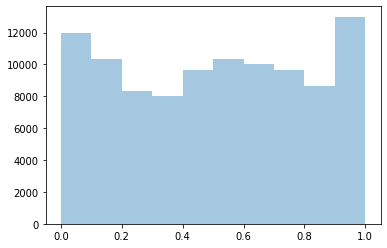

In [33]:
new_rd = PseudoRandomGen(6421893, m=101)
    
dist = []
for i in range(100000):
    dist.append(new_rd.gen_random() / 100)
    
sns.distplot(dist, bins=10, kde=False)